In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('KdTreeData.csv')

# df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      300 non-null    int64
 1   sub 1   300 non-null    int64
 2   sub 2   300 non-null    int64
 3   sub 3   300 non-null    int64
 4   sub 4   300 non-null    int64
 5   sub 5   300 non-null    int64
 6   sub 6   300 non-null    int64
 7   sub 7   300 non-null    int64
 8   sub 8   300 non-null    int64
 9   sub 9   300 non-null    int64
 10  sub 10  300 non-null    int64
dtypes: int64(11)
memory usage: 25.9 KB


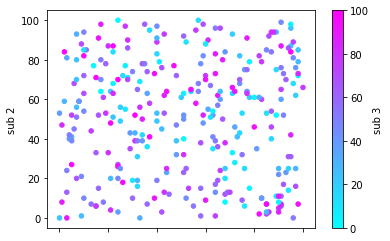

In [2]:
import matplotlib.pyplot as plt
df.plot(kind = 'scatter', 
    x = 'sub 1', 
    y = 'sub 2', 
    c= "sub 3", 
    colormap="cool")

plt.show()

In [5]:
point = np.random.randint(100, size=10)
print(point)

[68 73 29 84 49 23 51 88  6 19]


In [25]:
def nearest(dataFrame, point):
    df = dataFrame.reset_index()
    distMin = np.linalg.norm( df.iloc[0].to_numpy()[2:] - point)
    indexMin = 0
    for index, row in df.iterrows():
        dist = np.linalg.norm(row.to_numpy()[2:] - point)
        if dist < distMin:
            distMin = dist
            indexMin = index

    return df.iloc[indexMin], distMin 

pointMin, distance = nearest(df, point)
print(pointMin, '\n', distance)



index     227
id        228
sub 1      96
sub 2      81
sub 3      45
sub 4      78
sub 5      43
sub 6      52
sub 7      36
sub 8      51
sub 9      11
sub 10      8
Name: 227, dtype: int64 
 61.29437168288782


In [44]:
def groupNearest(dataFrame, point, n):
    df = dataFrame.reset_index()
    tempdf = df.iloc[:n].to_numpy()[:,2:]
    distMinArray = [ np.linalg.norm(i - point) for i in tempdf]
    indexMinArray = np.arange(0,n)
    for index, row in df[n:].iterrows():
        dist = np.linalg.norm(row.to_numpy()[2:] - point)
        if dist < np.max(distMinArray):
            indexMinArray = np.delete(indexMinArray, np.argmax(distMinArray))
            distMinArray = np.delete(distMinArray, np.argmax(distMinArray))
            indexMinArray = np.append(indexMinArray, index)
            distMinArray = np.append(distMinArray, dist)
    
    out = pd.DataFrame()
    for i in indexMinArray:
        out = out.append(df.iloc[i])
    
    return out, distMinArray

pointMinArray, distance = groupNearest(df, point, 20)
print(pointMinArray)
print(distance)

        id  index  sub 1  sub 10  sub 2  sub 3  sub 4  sub 5  sub 6  sub 7  \
29    30.0   29.0   63.0    46.0   41.0   47.0   57.0   45.0    3.0   28.0   
30    31.0   30.0   51.0    13.0   52.0   42.0   89.0   48.0   65.0   92.0   
83    84.0   83.0   95.0    34.0   87.0   20.0   78.0   88.0   41.0    1.0   
104  105.0  104.0   27.0    19.0   55.0   10.0   72.0   62.0   59.0   13.0   
120  121.0  120.0   74.0    60.0   70.0   64.0   80.0   68.0   89.0   78.0   
136  137.0  136.0   91.0    47.0   60.0   36.0   95.0    1.0    5.0   44.0   
139  140.0  139.0   11.0    14.0   85.0   56.0   92.0   43.0   68.0   68.0   
160  161.0  160.0   65.0    30.0   19.0   64.0   60.0   67.0   12.0   47.0   
175  176.0  175.0   64.0    46.0   96.0   53.0   11.0   42.0    0.0   32.0   
180  181.0  180.0   40.0     3.0   97.0   44.0   79.0   36.0   49.0   10.0   
186  187.0  186.0   36.0    10.0   74.0   62.0   95.0    8.0    6.0   60.0   
201  202.0  201.0   36.0    82.0   63.0   35.0  100.0   45.0   2

In [52]:
def nearerThan(dataFrame, point, maxDistance):
    df = dataFrame.reset_index()
    out = pd.DataFrame()
    distArray = np.empty(shape=[0, 1])
    for index, row in df.iterrows():
        dist = np.linalg.norm(row.to_numpy()[2:] - point)
        if dist < maxDistance:
            out = out.append(df.iloc[index])
            distArray = np.append(distArray, dist)
    
    return out, distArray
    
pointMinArray, distance = nearerThan(df, point, 80.0)
print(pointMinArray)
print(distance)

        id  index  sub 1  sub 10  sub 2  sub 3  sub 4  sub 5  sub 6  sub 7  \
29    30.0   29.0   63.0    46.0   41.0   47.0   57.0   45.0    3.0   28.0   
83    84.0   83.0   95.0    34.0   87.0   20.0   78.0   88.0   41.0    1.0   
104  105.0  104.0   27.0    19.0   55.0   10.0   72.0   62.0   59.0   13.0   
160  161.0  160.0   65.0    30.0   19.0   64.0   60.0   67.0   12.0   47.0   
180  181.0  180.0   40.0     3.0   97.0   44.0   79.0   36.0   49.0   10.0   
206  207.0  206.0   64.0    55.0   39.0   53.0   75.0   38.0   16.0   29.0   
227  228.0  227.0   96.0     8.0   81.0   45.0   78.0   43.0   52.0   36.0   
256  257.0  256.0   89.0    53.0   75.0   14.0   47.0   23.0   60.0   60.0   
275  276.0  275.0   32.0     4.0   39.0   50.0   95.0   66.0    7.0   38.0   

     sub 8  sub 9  
29    88.0   18.0  
83    72.0   10.0  
104   79.0   19.0  
160   97.0    3.0  
180   70.0   15.0  
206   69.0   53.0  
227   51.0   11.0  
256   60.0   12.0  
275   71.0   50.0  
[62.60990337 76.707